Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [14]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [25]:
import thinkstats2

pmf = thinkstats2.Pmf(resp.numkdhh)
print pmf

Pmf({0: 0.46617820227659301, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.087138558157791451, 4: 0.025644380478869556, 5: 0.010728771424833181})


Display the PMF.

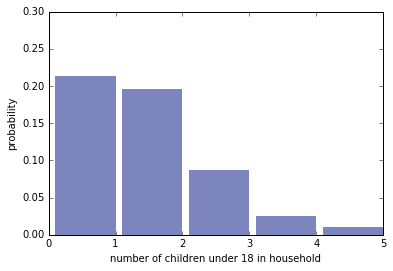

In [32]:
import thinkplot

thinkplot.Hist(pmf, align='right')
thinkplot.Config(xlabel='number of children under 18 in household',
                 ylabel='probability',
                 axis=[0, 5, 0, 0.3])

Define <tt>BiasPmf</tt>.

In [23]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [33]:
bpmf = BiasPmf(pmf)
print(bpmf)

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166})


Display the actual Pmf and the biased Pmf on the same axes.

#### As a histogram overlay

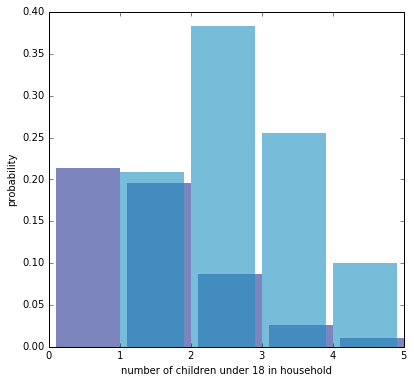

In [52]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf, align='right') # purple
thinkplot.Hist(bpmf, align='left') # blue
thinkplot.Config(xlabel='number of children under 18 in household',
                 ylabel='probability',
                 axis=[0, 5, 0, 0.4])

# ._. Can you make a legend with thinkplot? 
# It's a global variable with the config function in thinkplot.py...

#### As a step function overlay

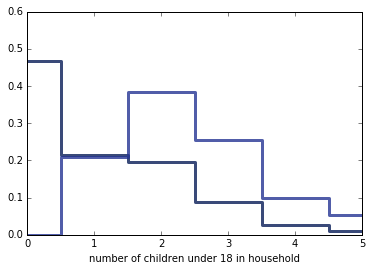

In [56]:
thinkplot.Pmfs([pmf, bpmf]) # purple, blue
thinkplot.Show(xlabel='number of children under 18 in household',
               axis=[0, 5, 0, 0.6])

Compute the means of the two Pmfs.

In [73]:
def compute_pmf_mean(pmf):
    m = 0
    for i in range(5):
        m += i*pmf[i]
    return m

pmf_mean = compute_pmf_mean(pmf)
print "The pmf mean is", pmf_mean
bpmf_mean = compute_pmf_mean(bpmf)
print "The bpmf mean is", bpmf_mean

The pmf mean is 0.97056129792
The bpmf mean is 2.14179867144


### ThinkStats Chapter 3, Exercise 3

I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap.

In [84]:
# I don't have time to implement this fully today (sorry!!) but 
# here is pseudocode:

# resp2 is a dataframe that contains the 
# subset of rows where numkdhh is at least 2
resp2 = resp[resp.numkdhh >= 2]
# display(resp2.head())

# pairwise differences between the first babies 
# and following babies of these respondents

import nsfg
pregdf = nsfg.ReadFemPreg()
# display(pregdf.head())
# match up the caseids for the respondents of interest and find the PRGLNGTH values

# make a pmf based off of PRGLNGTH for these first babies of
# these respondents and the following babies of these respondents

# display the results in a plot

# write commentary

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

The "biased" wording still seems strange to me somehow... The class size paradox in the reading made it seem as if the BiasPmf calculation was some representation for what the students are feeling versus the reality of the situation (the pmf). I'm still unclear how these multiplications mirror the perception of the students. 

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.